# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `16_ald_diff_analysis`

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)

In [2]:
# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters

In [3]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [4]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


In [5]:
params = vaep.nb.get_params(args, globals=globals())
params

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


{'folder_experiment': 'runs/alzheimer_study',
 'target': 'AD',
 'model_key': 'VAE',
 'baseline': 'PI',
 'out_folder': 'diff_analysis',
 'disease_ontology': 10652,
 'annotaitons_gene_col': 'None'}

In [6]:
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args

root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'target': 'AD'}

In [7]:
files_in = {
    'freq_features_observed.csv': args.folder_experiment / 'freq_features_observed.csv',
}
files_in

{'freq_features_observed.csv': PosixPath('runs/alzheimer_study/freq_features_observed.csv')}

## Excel file for exports

In [8]:
files_out = dict()

In [9]:
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
fname

PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx')

# Load scores

In [10]:
[x for x in args.scores_folder.iterdir() if 'scores' in str(x)]

[PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_None.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_None.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_PI.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_Median.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_RF.html'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_TRKNN.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_VAE.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_DAE.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_RF.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_DAE.html'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_QRILC.ht

In [11]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.570  1  1.180 0.279 0.006   
                             age        0.177  1  0.367 0.545 0.002   
                             Kiel       2.133  1  4.418 0.037 0.023   
                             Magdeburg  4.095  1  8.485 0.004 0.043   
                             Sweden     7.404  1 15.341 0.000 0.074   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.388  1  0.415 0.520 0.002   
                             age        0.684  1  0.731 0.394 0.004   
                             Kiel       0.126  1  0.134 0.715 0.001   
                             Magdeburg  2.461  1  2.628 0.107 0.014   
                             Sweden    16.618  1 17.748 0.000 0.085   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.555  0.440    False  
                             age               0.263  0.690    False  
                             Kiel              1.433  0.095    False  
                             Magdeburg         2.397  0.016     True  
                             Sweden            3.903  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.284  0.670    False  
                             age               0.405  0.558    False  
                             Kiel              0.146  0.819    False  
                             Magdeburg         0.972  0.221    False  
                             Sweden            4.411  0.000     True  

[7105 rows x 8 columns]

In [12]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.005  1  7.454 0.007 0.038   
                             age        0.010  1  0.077 0.782 0.000   
                             Kiel       0.259  1  1.917 0.168 0.010   
                             Magdeburg  0.413  1  3.061 0.082 0.016   
                             Sweden     1.538  1 11.401 0.001 0.056   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.476  1  2.936 0.088 0.015   
                             age        0.407  1  0.809 0.369 0.004   
                             Kiel       1.907  1  3.793 0.053 0.019   
                             Magdeburg  1.747  1  3.474 0.064 0.018   
                             Sweden    18.006  1 35.809 0.000 0.158   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.160  0.020     True  
                             age               0.107  0.853    False  
                             Kiel              0.775  0.273    False  
                             Magdeburg         1.087  0.154    False  
                             Sweden            3.051  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.054  0.164    False  
                             age               0.432  0.500    False  
                             Kiel              1.276  0.108    False  
                             Magdeburg         1.195  0.126    False  
                             Sweden            7.976  0.000     True  

[7105 rows x 8 columns]

In [13]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.570  1  1.180 0.279 0.006   
                             age        0.177  1  0.367 0.545 0.002   
                             Kiel       2.133  1  4.418 0.037 0.023   
                             Magdeburg  4.095  1  8.485 0.004 0.043   
                             Sweden     7.404  1 15.341 0.000 0.074   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.388  1  0.415 0.520 0.002   
                             age        0.684  1  0.731 0.394 0.004   
                             Kiel       0.126  1  0.134 0.715 0.001   
                             Magdeburg  2.461  1  2.628 0.107 0.014   
                             Sweden    16.618  1 17.748 0.000 0.085   

model                                                                   VAE  \
var                                    -Log10 pvalue qvalue rejected     SS   
protein groups               Source                                           
A0A024QZX5;A0A087X1N8;P35237 AD                0.555  0.440    False  1.005   
                             age               0.263  0.690    False  0.010   
                             Kiel              1.433  0.095    False  0.259   
                             Magdeburg         2.397  0.016     True  0.413   
                             Sweden            3.903  0.001     True  1.538   
...                                              ...    ...      ...    ...   
S4R3U6                       AD                0.284  0.670    False  1.476   
                             age               0.405  0.558    False  0.407   
                             Kiel              0.146  0.819    False  1.907   
                             Magdeburg         0.972  0.221    False  1.747   
                             Sweden            4.411  0.000     True 18.006   

model                                                                       \
var                                    DF      F p-unc   np2 -Log10 pvalue   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD         1  7.454 0.007 0.038         2.160   
                             age        1  0.077 0.782 0.000         0.107   
                             Kiel       1  1.917 0.168 0.010         0.775   
                             Magdeburg  1  3.061 0.082 0.016         1.087   
                             Sweden     1 11.401 0.001 0.056         3.051   
...                                    ..    ...   ...   ...           ...   
S4R3U6                       AD         1  2.936 0.088 0.015         1.054   
                             age        1  0.809 0.369 0.004         0.432   
                             Kiel       1  3.793 0.053 0.019         1.276   
                             Magdeburg  1  3.474 0.064 0.018         1.195   
                             Sweden     1 35.809 0.000 0.158         7.976   

model                                                   
var                                    qvalue rejected  
protein groups               Source                     
A0A024QZX5;A0A087X1N8;P35237 AD         0.020     True  
                             age        0.853    False  
                             Kiel       0.273    False  
                             Magdeburg  0.154    False  
                             Sweden     0.003     True  
...                                       ...      ...  
S4R3U6                       AD         0.164    False  
                             age        0.500    False  
                             Kiel       0.108    False  
                             Magdeburg  0.126    False  
                             Sweden     0.000     True  

[7105 

In [14]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

In [15]:
scores.describe()

model        PI                                                        \
var          SS        DF         F     p-unc       np2 -Log10 pvalue   
count 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000     7,105.000   
mean     10.290     1.000    12.470     0.262     0.043         2.490   
std      62.832     0.000    84.733     0.304     0.084         5.339   
min       0.000     1.000     0.000     0.000     0.000         0.000   
25%       0.308     1.000     0.528     0.004     0.003         0.329   
50%       1.591     1.000     2.407     0.122     0.012         0.912   
75%       5.950     1.000     8.743     0.468     0.044         2.456   
max   3,872.223     1.000 6,064.566     1.000     0.969       145.937   

model                 VAE                                          \
var      qvalue        SS        DF         F     p-unc       np2   
count 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000   
mean      0.339     5.498     1.000    16.494     0.224     0.058   
std       0.332    21.376     0.000    48.756     0.294     0.103   
min       0.000     0.000     1.000     0.000     0.000     0.000   
25%       0.014     0.189     1.000     0.747     0.000     0.004   
50%       0.245     1.010     1.000     3.608     0.059     0.019   
75%       0.625     3.764     1.000    12.641     0.389     0.062   
max       1.000   989.424     1.000 1,311.770     1.000     0.873   

model                          
var   -Log10 pvalue    qvalue  
count     7,105.000 7,105.000  
mean          3.323     0.277  
std           6.243     0.321  
min           0.000     0.000  
25%           0.411     0.002  
50%           1.229     0.118  
75%           3.323     0.518  
max          86.765     1.000

In [16]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI           \
var                                                          SS DF     F   
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD     0.570  1 1.180   
A0A024R0T9;K7ER74;P02655                           AD     3.292  1 3.696   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     1.345  1 2.004   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.096  1 0.525   
A0A075B6H7                                         AD     6.754  1 1.714   
...                                                         ... ..   ...   
Q9Y6R7                                             AD     0.675  1 1.850   
Q9Y6X5                                             AD     3.837  1 4.657   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.973  1 3.028   
Q9Y6Y9                                             AD     0.024  1 0.031   
S4R3U6                                             AD     0.388  1 0.415   

model                                                                  \
var                                                       p-unc   np2   
protein groups                                     Source               
A0A024QZX5;A0A087X1N8;P35237                       AD     0.279 0.006   
A0A024R0T9;K7ER74;P02655                           AD     0.056 0.019   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.159 0.010   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.470 0.003   
A0A075B6H7                                         AD     0.192 0.009   
...                                                         ...   ...   
Q9Y6R7                                             AD     0.175 0.010   
Q9Y6X5                                             AD     0.032 0.024   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083 0.016   
Q9Y6Y9                                             AD     0.861 0.000   
S4R3U6                                             AD     0.520 0.002   

model                                                                    \
var                                                       -Log10 pvalue   
protein groups                                     Source                 
A0A024QZX5;A0A087X1N8;P35237                       AD             0.555   
A0A024R0T9;K7ER74;P02655                           AD             1.252   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD             0.800   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD             0.328   
A0A075B6H7                                         AD             0.717   
...                                                                 ...   
Q9Y6R7                                             AD             0.756   
Q9Y6X5                                             AD             1.493   
Q9Y6Y8;Q9Y6Y8-2                                    AD             1.079   
Q9Y6Y9                                             AD             0.065   
S4R3U6                                             AD             0.284   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.440    False   
A0A024R0T9;K7ER74;P02655                           AD      0.133    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.294    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.625    False   
A0A075B6H7                                         AD      0.338    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.086    False   
Q9Y6Y8;Q9Y6Y8-

In [17]:
scores.describe()

model        PI                                                        \
var          SS        DF         F     p-unc       np2 -Log10 pvalue   
count 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000     1,421.000   
mean      3.666     1.000     4.885     0.254     0.024         1.408   
std       6.419     0.000     7.826     0.291     0.032         1.659   
min       0.000     1.000     0.000     0.000     0.000         0.000   
25%       0.370     1.000     0.593     0.011     0.003         0.354   
50%       1.549     1.000     2.424     0.121     0.013         0.917   
75%       4.139     1.000     6.596     0.442     0.033         1.959   
max      73.658     1.000   151.229     1.000     0.442        25.253   

model                 VAE                                          \
var      qvalue        SS        DF         F     p-unc       np2   
count 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000   
mean      0.337     1.863     1.000     5.750     0.238     0.028   
std       0.318     3.193     0.000     8.585     0.294     0.037   
min       0.000     0.000     1.000     0.000     0.000     0.000   
25%       0.036     0.170     1.000     0.677     0.006     0.004   
50%       0.243     0.792     1.000     2.982     0.086     0.015   
75%       0.603     2.326     1.000     7.628     0.412     0.038   
max       1.000    43.099     1.000   116.543     0.999     0.379   

model                          
var   -Log10 pvalue    qvalue  
count     1,421.000 1,421.000  
mean          1.605     0.297  
std           1.846     0.317  
min           0.001     0.000  
25%           0.385     0.018  
50%           1.066     0.160  
75%           2.200     0.541  
max          20.788     0.999

In [18]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1026,931


## Load frequencies of observed features

In [19]:
freq_feat = pd.read_csv(files_in['freq_features_observed.csv'], index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


# Compare shared features

In [20]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                      SS DF     F p-unc   np2   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.570  1 1.180 0.279 0.006   
A0A024R0T9;K7ER74;P02655                           3.292  1 3.696 0.056 0.019   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 1.345  1 2.004 0.159 0.010   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.096  1 0.525 0.470 0.003   
A0A075B6H7                                         6.754  1 1.714 0.192 0.009   
...                                                  ... ..   ...   ...   ...   
Q9Y6R7                                             0.675  1 1.850 0.175 0.010   
Q9Y6X5                                             3.837  1 4.657 0.032 0.024   
Q9Y6Y8;Q9Y6Y8-2                                    0.973  1 3.028 0.083 0.016   
Q9Y6Y9                                             0.024  1 0.031 0.861 0.000   
S4R3U6                                             0.388  1 0.415 0.520 0.002   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.555  0.440   
A0A024R0T9;K7ER74;P02655                                   1.252  0.133   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.800  0.294   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.328  0.625   
A0A075B6H7                                                 0.717  0.338   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.493  0.086   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.065  0.919   
S4R3U6                                                     0.284  0.670   

                                                              VAE            \
                                                   rejected    SS DF      F   
protein groups                                                                
A0A024QZX5;A0A087X1N8;P35237                          False 1.005  1  7.454   
A0A024R0T9;K7ER74;P02655                              False 2.911  1  4.729   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.121  1  0.998   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.184  1  1.326   
A0A075B6H7                                            False 8.154  1 11.722   
...                                                     ...   ... ..    ...   
Q9Y6R7                                                False 0.675  1  1.850   
Q9Y6X5                                                False 0.572  1  1.738   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.973  1  3.028   
Q9Y6Y9                                                False 0.003  1  0.004   
S4R3U6                                                False 1.476  1  2.936   

                                                                              \
                                                   p-unc   np2 -Log10 pvalue   
protein groups                                                                 
A0A024QZX5;A0A087X1N8;P35237                       0.007 0.038         2.160   
A0A024R0T9;K7ER74;P02655                           0.031 0.024         1.510   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.319 0.005         0.496   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.251 0.007         0.600   
A0A075B6H7                                         0.001 0.058         3.122   
...                                                  ...   ...           ...   
Q9Y6R7                                   

In [21]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    870
PI (yes) - VAE (yes)   334
PI (no)  - VAE (yes)   156
PI (yes) - VAE (no)     61
Name: count, dtype: int64

In [22]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)

scores_common.loc[mask_different]

PI                                            \
                                SS DF     F p-unc   np2 -Log10 pvalue qvalue   
protein groups                                                                 
A0A024QZX5;A0A087X1N8;P35237 0.570  1 1.180 0.279 0.006         0.555  0.440   
A0A075B6H7                   6.754  1 1.714 0.192 0.009         0.717  0.338   
A0A075B6H9                   1.715  1 0.656 0.419 0.003         0.378  0.581   
A0A075B6I0                   8.231  1 5.683 0.018 0.029         1.742  0.054   
A0A075B6J9                   8.544  1 3.859 0.051 0.020         1.293  0.123   
...                            ... ..   ...   ...   ...           ...    ...   
Q9ULP0-3;Q9ULP0-6            6.349  1 4.403 0.037 0.023         1.430  0.096   
Q9UNW1                       8.737  1 6.778 0.010 0.034         2.002  0.033   
Q9UP79                       2.152  1 1.327 0.251 0.007         0.601  0.409   
Q9UQ52                       1.603  1 3.027 0.084 0.016         1.078  0.182   
Q9Y6C2                       0.238  1 0.229 0.633 0.001         0.199  0.758   

                                         VAE                        \
                             rejected     SS DF      F p-unc   np2   
protein groups                                                       
A0A024QZX5;A0A087X1N8;P35237    False  1.005  1  7.454 0.007 0.038   
A0A075B6H7                      False  8.154  1 11.722 0.001 0.058   
A0A075B6H9                      False  7.260  1  5.526 0.020 0.028   
A0A075B6I0                      False 10.427  1 12.010 0.001 0.059   
A0A075B6J9                      False  3.722  1  6.259 0.013 0.032   
...                               ...    ... ..    ...   ...   ...   
Q9ULP0-3;Q9ULP0-6               False 11.233  1 12.750 0.000 0.063   
Q9UNW1                           True  0.002  1  0.014 0.907 0.000   
Q9UP79                          False  2.613  1 18.450 0.000 0.088   
Q9UQ52                          False  1.870  1 12.782 0.000 0.063   
Q9Y6C2                          False  2.520  1  5.800 0.017 0.029   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.160  0.020     True       186  
A0A075B6H7                           3.122  0.003     True        91  
A0A075B6H9                           1.704  0.048     True       189  
A0A075B6I0                           3.185  0.003     True       194  
A0A075B6J9                           1.879  0.034     True       156  
...                                    ...    ...      ...       ...  
Q9ULP0-3;Q9ULP0-6                    3.346  0.002     True       136  
Q9UNW1                               0.042  0.942    False       171  
Q9UP79                               4.557  0.000     True       135  
Q9UQ52                               3.353  0.002     True       188  
Q9Y6C2                               1.770  0.042     True       119  

[217 rows x 17 columns]

In [23]:
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)

In [24]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.440,0.020,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.133,0.069,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.294,0.451,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.625,0.374,196,PI (no) - VAE (no)
A0A075B6H7,0.338,0.003,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.317,0.283,197,PI (no) - VAE (no)
Q9Y6X5,0.086,0.300,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.157,197,PI (no) - VAE (no)


## Plot of intensities for most extreme example

In [25]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q9NS84,0.985,0.002,83,PI (no) - VAE (yes),0.983
J3KSJ8;Q9UD71;Q9UD71-2,0.990,0.015,51,PI (no) - VAE (yes),0.975
A0A087X1Z2;C9JTV4;H0Y4Y4;Q8WYH2;Q96C19;Q9BUP0;Q9BUP0-2,0.000,0.968,66,PI (yes) - VAE (no),0.968
O75339,0.046,0.999,55,PI (yes) - VAE (no),0.953
A0A0C4DH31,0.947,0.007,52,PI (no) - VAE (yes),0.940
...,...,...,...,...,...
Q9NX62,0.055,0.045,197,PI (no) - VAE (yes),0.010
P00740;P00740-2,0.052,0.043,197,PI (no) - VAE (yes),0.010
K7ERG9;P00746,0.051,0.042,197,PI (no) - VAE (yes),0.010


## Differences plotted

- first only using created annotations

fontTools.subset - INFO     maxp pruned


fontTools.subset - INFO     cmap pruned


fontTools.subset - INFO     kern dropped


fontTools.subset - INFO     post pruned


fontTools.subset - INFO     FFTM dropped


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     Added gid0 to subset


fontTools.subset - INFO     Added first four glyphs to subset


fontTools.subset - INFO     Closing glyph list over 'MATH': 31 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'E', 'I', 'P', 'V', 'a', 'e', 'eight', 'f', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 40, 44, 51, 57, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92]


fontTools.subset - INFO     Closed glyph list over 'MATH': 37 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'E', 'I', 'P', 'V', 'a', 'e', 'eight', 'f', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 40, 44, 51, 57, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closing glyph list over 'GSUB': 37 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'E', 'I', 'P', 'V', 'a', 'e', 'eight', 'f', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 40, 44, 51, 57, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closed glyph list over 'GSUB': 40 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'E', 'I', 'P', 'V', 'a', 'e', 'eight', 'f', 'fl', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 40, 44, 51, 57, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5040, 5042]


fontTools.subset - INFO     Closing glyph list over 'glyf': 40 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'E', 'I', 'P', 'V', 'a', 'e', 'eight', 'f', 'fl', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 40, 44, 51, 57, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5040, 5042]


fontTools.subset - INFO     Closed glyph list over 'glyf': 40 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'E', 'I', 'P', 'V', 'a', 'e', 'eight', 'f', 'fl', 'four', 'hyphen', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 36, 40, 44, 51, 57, 68, 72, 73, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5040, 5042]


fontTools.subset - INFO     Retaining 40 glyphs


fontTools.subset - INFO     head subsetting not needed


fontTools.subset - INFO     hhea subsetting not needed


fontTools.subset - INFO     maxp subsetting not needed


fontTools.subset - INFO     OS/2 subsetting not needed


fontTools.subset - INFO     hmtx subsetted


fontTools.subset - INFO     cmap subsetted


fontTools.subset - INFO     fpgm subsetting not needed


fontTools.subset - INFO     prep subsetting not needed


fontTools.subset - INFO     cvt  subsetting not needed


fontTools.subset - INFO     loca subsetting not needed


fontTools.subset - INFO     post subsetted


fontTools.subset - INFO     gasp subsetting not needed


fontTools.subset - INFO     MATH subsetted


fontTools.subset - INFO     GDEF subsetted


fontTools.subset - INFO     GPOS subsetted


fontTools.subset - INFO     GSUB subsetted


fontTools.subset - INFO     name subsetting not needed


fontTools.subset - INFO     glyf subsetted


fontTools.subset - INFO     head pruned


fontTools.subset - INFO     OS/2 Unicode ranges pruned: [0]


fontTools.subset - INFO     OS/2 CodePage ranges pruned: [0]


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     GDEF pruned


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     name pruned


vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


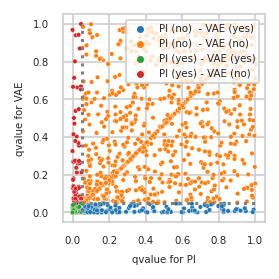

In [26]:
figsize = (2, 2)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- showing how many features were measured ("observed")

fontTools.subset - INFO     maxp pruned


fontTools.subset - INFO     cmap pruned


fontTools.subset - INFO     kern dropped


fontTools.subset - INFO     post pruned


fontTools.subset - INFO     FFTM dropped


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     Added gid0 to subset


fontTools.subset - INFO     Added first four glyphs to subset


fontTools.subset - INFO     Closing glyph list over 'MATH': 40 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'V', 'a', 'c', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 57, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92]


fontTools.subset - INFO     Closed glyph list over 'MATH': 46 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'V', 'a', 'c', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 57, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closing glyph list over 'GSUB': 46 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'V', 'a', 'c', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 57, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closed glyph list over 'GSUB': 51 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'V', 'a', 'c', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 57, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Closing glyph list over 'glyf': 51 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'V', 'a', 'c', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 57, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Closed glyph list over 'glyf': 51 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'I', 'P', 'V', 'a', 'c', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 44, 51, 57, 68, 70, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Retaining 51 glyphs


fontTools.subset - INFO     head subsetting not needed


fontTools.subset - INFO     hhea subsetting not needed


fontTools.subset - INFO     maxp subsetting not needed


fontTools.subset - INFO     OS/2 subsetting not needed


fontTools.subset - INFO     hmtx subsetted


fontTools.subset - INFO     cmap subsetted


fontTools.subset - INFO     fpgm subsetting not needed


fontTools.subset - INFO     prep subsetting not needed


fontTools.subset - INFO     cvt  subsetting not needed


fontTools.subset - INFO     loca subsetting not needed


fontTools.subset - INFO     post subsetted


fontTools.subset - INFO     gasp subsetting not needed


fontTools.subset - INFO     MATH subsetted


fontTools.subset - INFO     GDEF subsetted


fontTools.subset - INFO     GPOS subsetted


fontTools.subset - INFO     GSUB subsetted


fontTools.subset - INFO     name subsetting not needed


fontTools.subset - INFO     glyf subsetted


fontTools.subset - INFO     head pruned


fontTools.subset - INFO     OS/2 Unicode ranges pruned: [0]


fontTools.subset - INFO     OS/2 CodePage ranges pruned: [0]


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     GDEF pruned


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     name pruned


vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


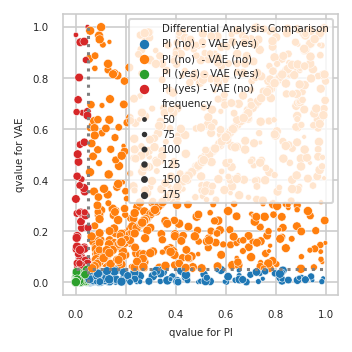

In [27]:
figsize = (2.5, 2.5)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

# Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [28]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat)
                         )
    display(scores_model_only)
else:
    scores_model_only = None

In [29]:
if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

# DISEASES DB lookup

In [30]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [31]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

# Outputs

In [ ]:
writer.close()

In [ ]:
files_out